<small><i>This notebook was put together by [Jake Vanderplas](http://www.vanderplas.com). Source and license info is on [GitHub](https://github.com/jakevdp/sklearn_tutorial/).</i></small>

# Supervised Learning In-Depth: Support Vector Machines

Previously we introduced supervised machine learning.
There are many supervised learning algorithms available; here we'll go into brief detail one of the most powerful and interesting methods: **Support Vector Machines (SVMs)**.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
# use seaborn plotting defaults
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

## Motivating Support Vector Machines

In [3]:
import pandas as pd
df = pd.read_csv(r'/Users/david/Downloads/ALLUKAuctions.csv', error_bad_lines=False,encoding = "ISO-8859-1")
df.head()
df["Auction Date"] = pd.to_datetime(df["Auction Date"], infer_datetime_format=True)


In [4]:
df = df[(df["Maturity Bracket"] == "Long") | (df["Maturity Bracket"] == "Medium")]

In [5]:
from sklearn import preprocessing
#df_mod = df.dropna()

df_mod = df[["Bid to Cover Ratio at Auction","Yield Tail (bp)","Yield corresponding to AAP (%)","Maturity Bracket","Auction Date"]]
df_mod = df_mod.dropna()
bc = df_mod["Bid to Cover Ratio at Auction"]
yc = df_mod["Yield corresponding to AAP (%)"]
yt = df_mod["Yield Tail (bp)"]
dt = df_mod["Auction Date"]
#X = np.array ([bc.values, yt.values]).T
X_orig = np.array ([bc.values, np.array(dt.values, dtype=float), yt.values, yc.values]).T
X_orig = preprocessing.scale(X_orig)

#this is if you want to do the PCA
from sklearn.decomposition import PCA

X = PCA(2).fit_transform(X_orig)

print(X[0:5])
print(X.mean(axis=0))
print(X.std(axis = 0))
#y = np.array([yt.values]).T
c = df_mod["Maturity Bracket"]
le = preprocessing.LabelEncoder()
print(c.unique())
le.fit(c.unique())
c_vals = le.transform(c.values)
y = c_vals
print(X[0:5, 0:5])
#print(dt.head().values.to_float())

[[ 2.85480049  0.27404605]
 [ 2.28841415 -1.59215676]
 [ 2.42121235 -0.45604117]
 [ 2.22972227 -2.54548744]
 [ 2.43022943 -1.01300598]]
[  0.00000000e+00   2.22740670e-17]
[ 1.35270645  1.12550682]
['Long' 'Medium']
[[ 2.85480049  0.27404605]
 [ 2.28841415 -1.59215676]
 [ 2.42121235 -0.45604117]
 [ 2.22972227 -2.54548744]
 [ 2.43022943 -1.01300598]]


Support Vector Machines (SVMs) are a powerful supervised learning algorithm used for **classification** or for **regression**. SVMs are a **discriminative** classifier: that is, they draw a boundary between clusters of data.

Let's show a quick example of support vector classification. First we need to create a dataset:

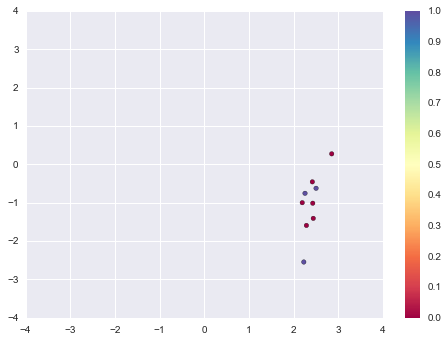

In [6]:


#from sklearn.datasets.samples_generator import make_blobs
#X, y = make_blobs(n_samples=50, centers=2,
#                  random_state=0, cluster_std=0.60)
def plot_points (num = 10):
    plt.scatter(X[:num, 0], X[:num, 1], c=c_vals[:num], cmap='Spectral');
    plt.axis([-4,4,-4,4])
    plt.colorbar()

from IPython.html.widgets import interact
interact(plot_points, num=[0, len(X)]);

A discriminative classifier attempts to draw a line between the two sets of data. Immediately we see a problem: such a line is ill-posed! For example, we could come up with several possibilities which perfectly discriminate between the classes in this example:

These are three *very* different separaters which perfectly discriminate between these samples. Depending on which you choose, a new data point will be classified almost entirely differently!

How can we improve on this?

### Support Vector Machines: Maximizing the *Margin*

Support vector machines are one way to address this.
What support vector machined do is to not only draw a line, but consider a *region* about the line of some given width.  Here's an example of what it might look like:

Notice here that if we want to maximize this width, the middle fit is clearly the best.
This is the intuition of **support vector machines**, which optimize a linear discriminant model in conjunction with a **margin** representing the perpendicular distance between the datasets.

#### Fitting a Support Vector Machine

Now we'll fit a Support Vector Machine Classifier to these points. While the mathematical details of the likelihood model are interesting, we'll let you read about those elsewhere. Instead, we'll just treat the scikit-learn algorithm as a black box which accomplishes the above task.

In [7]:
from sklearn.svm import SVC  # "Support Vector Classifier"
clf = SVC(kernel='linear')
print(X.shape)
print(c_vals.T)
clf.fit(X, c_vals.T)
X[0:5]

(319, 2)
[0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0
 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0
 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0
 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1
 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0
 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0
 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1
 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0]


array([[ 2.85480049,  0.27404605],
       [ 2.28841415, -1.59215676],
       [ 2.42121235, -0.45604117],
       [ 2.22972227, -2.54548744],
       [ 2.43022943, -1.01300598]])

To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:

In [8]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

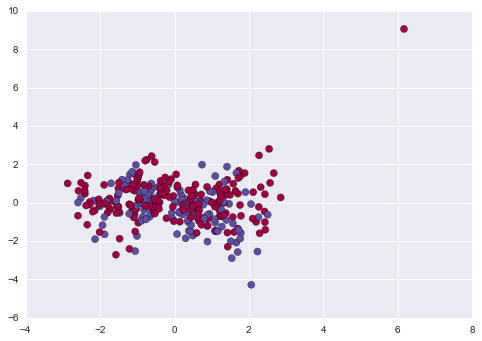

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=c_vals, s=50, cmap='Spectral')

#plot_svc_decision_function(clf);

Notice that the dashed lines touch a couple of the points: these points are the pivotal pieces of this fit, and are known as the *support vectors* (giving the algorithm its name).
In scikit-learn, these are stored in the ``support_vectors_`` attribute of the classifier:

Let's use IPython's ``interact`` functionality to explore how the distribution of points affects the support vectors and the discriminative fit.
(This is only available in IPython 2.0+, and will not work in a static view)

Notice the unique thing about SVM is that only the support vectors matter: that is, if you moved any of the other points without letting them cross the decision boundaries, they would have no effect on the classification results!

#### Going further: Kernel Methods

Where SVM gets incredibly exciting is when it is used in conjunction with *kernels*.
To motivate the need for kernels, let's look at some data which is not linearly separable:

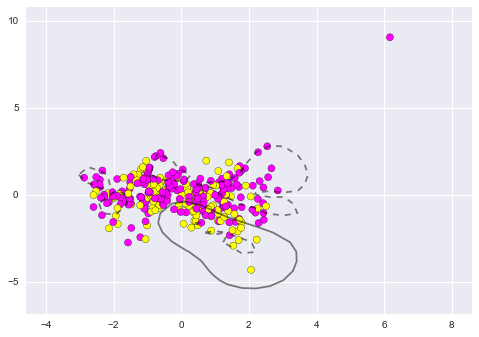

In [10]:
from sklearn.datasets.samples_generator import make_circles

#X = np.array ([bc.values, yc.values, yt.values]).T
#X = np.array ([bc.values, yc.values, yt.values]).T

clf = SVC(kernel='rbf').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

Clearly, no linear discrimination will ever separate these data.
One way we can adjust this is to apply a **kernel**, which is some functional transformation of the input data.

For example, one simple model we could use is a **radial basis function**

In [11]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

If we plot this along with our data, we can see the effect of it:

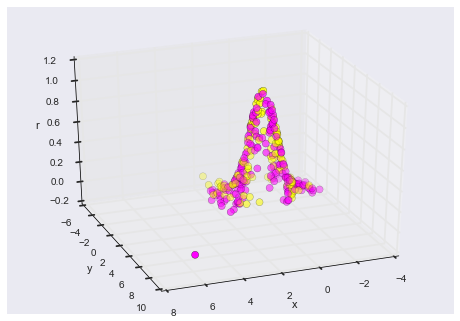

In [12]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180));

We can see that with this additional dimension, the data becomes trivially linearly separable!
This is a relatively simple kernel; SVM has a more sophisticated version of this kernel built-in to the process. This is accomplished by using ``kernel='rbf'``, short for *radial basis function*:

(319, 2)


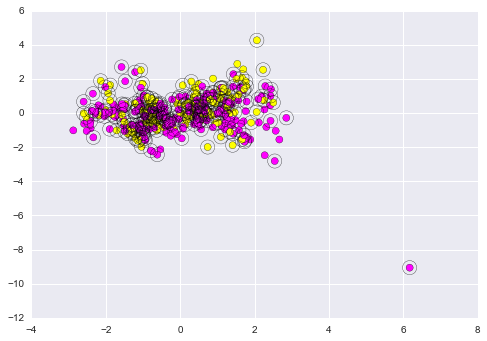

In [12]:

clf = SVC(kernel='rbf')
#X = np.array ([bc.values, yc.values, yt.values]).T
print(X.shape)
clf.fit(X, y)
#print(X[:,2])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
#plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');
y_pred = clf.predict(X)




[[174 100]
 [ 15  30]]
score:  0.639498432602


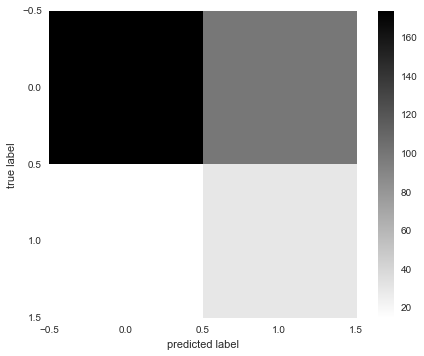

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y)
plt.imshow(cm,
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");
print(cm)
print("score: " , clf.score(X,y))

In [14]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import ShuffleSplit
num_samp, features = X.shape

cv = ShuffleSplit(num_samp, n_iter=10, test_size=0.1,
    random_state=0)

test_scores = cross_val_score(clf, X, y, cv=cv, n_jobs=2)
print(test_scores)
print (np.mean(test_scores))

[ 0.53125  0.625    0.5625   0.625    0.71875  0.46875  0.4375   0.75
  0.59375  0.46875]
0.578125


[[148  74]
 [ 41  56]]
0.639498432602


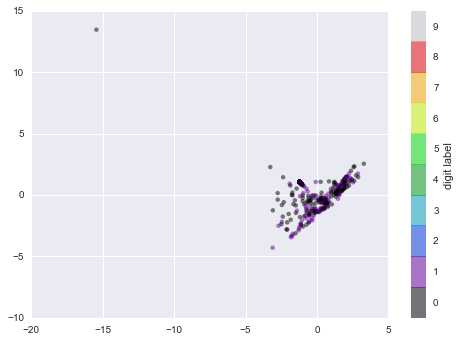

In [15]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=6)
data_projected = iso.fit_transform(X_orig)
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=y,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(penalty='l2')
clf2.fit(data_projected, y)
ypred = clf2.predict(data_projected)
cm2 = confusion_matrix(ypred, y)
ac2 = clf2.score(data_projected, y)
print(cm2)
print(ac2)

Here there are effectively $N$ basis functions: one centered at each point! Through a clever mathematical trick, this computation proceeds very efficiently using the "Kernel Trick", without actually constructing the matrix of kernel evaluations.

We'll leave SVMs for the time being and take a look at another classification algorithm: Random Forests.

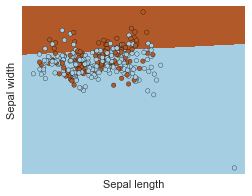

In [21]:
logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, y)
h = 0.02
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()